## Loan Prediction Problem

### This excersice is designed to solve binary classification.

#### Expectations:

    1. Introduction to the problem

    2. Exploratory Data Analysis (EDA) and Pre-Processing

    3. Model building and Feature engineering
    
#### Problem Statement:

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban and rural areas. Customers first apply for a home loan after that company validates the customer’s eligibility for a loan. The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer segments, that are eligible for loan amounts so that they can specifically target these customers.

It is a classification problem where we have to predict whether a loan would be approved or not. 

In [1]:
# Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data:

# train = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\train_u6lujuX_CVtuZ9i.csv")
# test = pd.read_csv(r"C:\Users\AAvendano\Downloads\PY\ML\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\test_Y3wMUE5_7gLdaTN.csv")

train = pd.read_csv(r"D:\PROJECTS\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv(r"D:\PROJECTS\MACHINE-LEARNING-AND-DATA-SCIENCE-PROJECTS\CLASSIFICATION\LOAN_PREDICTION\Data_set\test_Y3wMUE5_7gLdaTN.csv")

In [3]:
# To keep the original data, it is a good practice to make a copy. Let's just do that:

train_original = train.copy()
test_original = test.copy()

In [6]:
# Checking the data we have

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


### The only difference between the data sets are the Loan status which is the target. That's the one we are going to predict.

## Description for each variable present in the data frame:

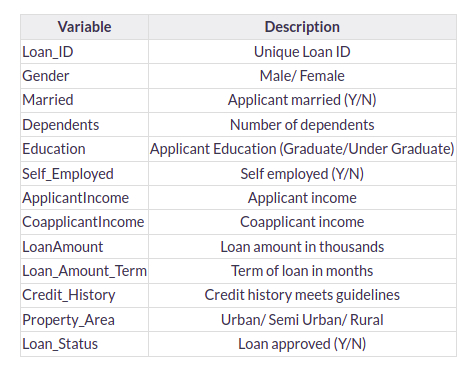

In [8]:
# Understanding the data types:

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### We have 6 categorical variables which are:  

    Loan_ID
    Gender
    Married
    Dependents
    Education
    Self_Employed
    Loan_Status
    
### We have 6 numerical variables:

    ApplicantIncome        
    CoapplicantIncome
    LoanAmount
    Loan_Amount_Term
    Credit_History
    Property_Area

In [4]:
# Let's now look at the shape:

train.shape, test.shape

((614, 13), (367, 12))

## Univariate Analysis.

Loan_Status: As it is a categorical variable, let us look at its frequency table, percentage distribution, and bar plot.

In [5]:
# Checking the frecuency
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
# Checking the proportion
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### We can see the distribution here. Around 69% of people got approve in regard to the loan. Total amount of people is 442+192 = 614. So, from 442 out of 614 got approved.

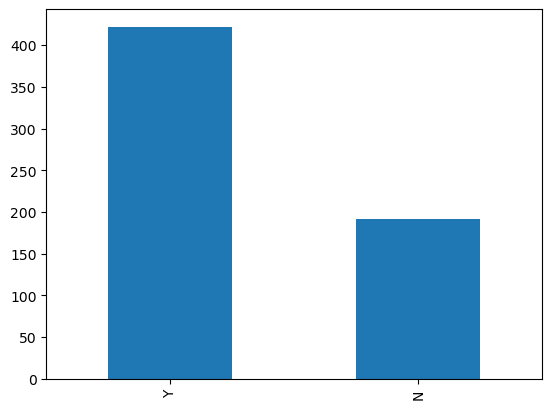

In [7]:
train["Loan_Status"].value_counts().plot.bar();

### Now, let’s visualize each variable separately:

    Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History)

    Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

    Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Loan_Status)
    
### Independent Variable (Categorical): (Gender, Married, Self_Employed, Credit_History)

In [10]:
# Plotting Categorical

def bar_plot(colomn):
    
    """To make the bar plot container"""
    
    # THIS SECTION WOULD PARSE ALL THE LABELS INTO A STRING:        
    original_X = list(colomn.value_counts(normalize = True).index) # Say, labels
    X = [] # Final X labels
    
    for item in original_X:
        X.append(str(item))
        # End of for
    
    # Y-AXIS CONVERTED INTO A PERCENTAGE FASHION
    y = colomn.value_counts(normalize = True).unique()*100 # y, the 100 is to show it in percentages.
    title = colomn.value_counts().name # Getting the title
    
    bar = plt.bar(X, y, fc = "lightgray", ec = "black") # Container
    plt.bar_label(bar, label_type="edge", padding = 1, fmt='%.3f%%')
    plt.title(title)
    plt.ylim(0, 100)
    plt.tight_layout()

In [11]:
# Plotting Oridinals

# Plotting

def bar_plot_1(colomn):
    
    """To make the bar plot container"""
    
    # THIS SECTION WOULD PARSE ALL THE LABELS INTO A STRING:        
    original_X = list(colomn.value_counts(normalize = True).index) # Say, labels
    X = [] # Final X labels
    
    for item in original_X:
        X.append(str(item))
        # End of for
    
    # Y-AXIS CONVERTED INTO A PERCENTAGE FASHION
    y = colomn.value_counts(normalize = True).unique()*100 # y, the 100 is to show it in percentages.
    title = colomn.value_counts().name # Getting the title
    
    bar = plt.barh(X, y, fc = "lightgray", ec = "black") # Container
    plt.bar_label(bar, label_type="edge", padding = 1, fmt='%.3f%%')
    plt.title(title)
    plt.xlim(0, 100)
    plt.tight_layout()

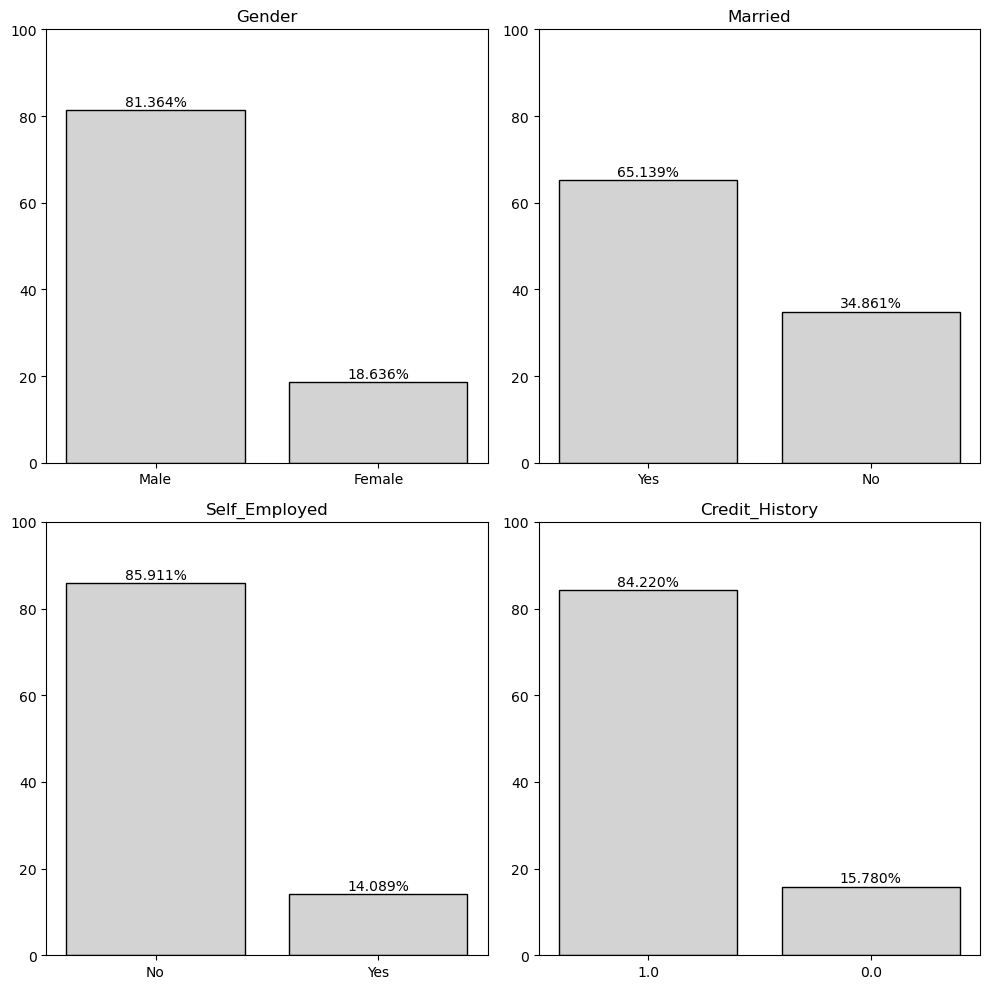

In [12]:
# https://www.w3schools.com/python/matplotlib_subplot.asp

# plot 1
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
barplot = bar_plot(train["Gender"])
# barplot = train["Gender"].value_counts(normalize = True).plot.bar(figsize = (20, 10),
#                                                        title = "Gender")
# plt.bar_label(barplot, label_type="edge")
# plot 2
plt.subplot(2, 2, 2)
barplot = bar_plot(train["Married"])

# plot 3
plt.subplot(2, 2, 3)
barplot = bar_plot(train["Self_Employed"])

# plot 4
plt.subplot(2, 2, 4)
barplot = bar_plot(train["Credit_History"])

### It can be inferred from the above bar plots that:

    1. 81% of applicants in the dataset are male.
    2. Around 65% of the applicants in the dataset are married.
    3. About 14% of applicants in the dataset are self-employed.
    4. About 84% of applicants have repaid their debts.
    
### Now let’s visualize the ordinal variables: (Dependents, Education, Property_Area)

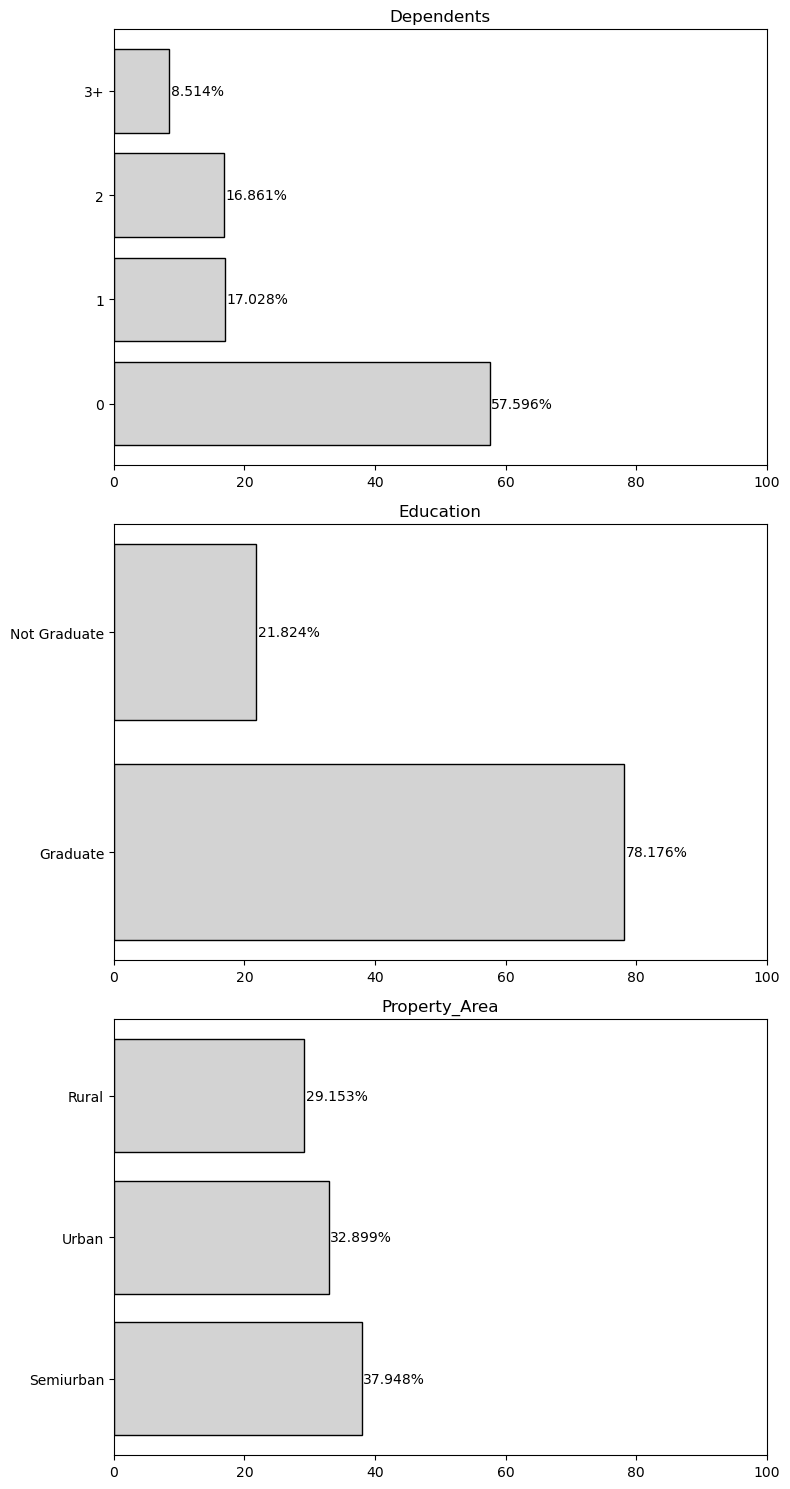

In [13]:
plt.figure(figsize=(8,15))

# plot 1
plt.subplot(3,1,1)
bar_plot_1(train["Dependents"])

# plot 2
plt.subplot(3,1,2)
bar_plot_1(train["Education"])

# plot 3
plt.subplot(3,1,3)
bar_plot_1(train["Property_Area"])


### Following inferences can be made from the above bar plots:

    1. Most of the applicants don’t have dependents.
    2. About 79% of the applicants are graduates.
    3. Most of the applicants are from semi-urban areas.
    
### Now, let's vizualize the Independent Variable (Numerical):

C:\Users\AlbertoJ\AppData\Local\Temp\ipykernel_14792\4125724679.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["ApplicantIncome"])


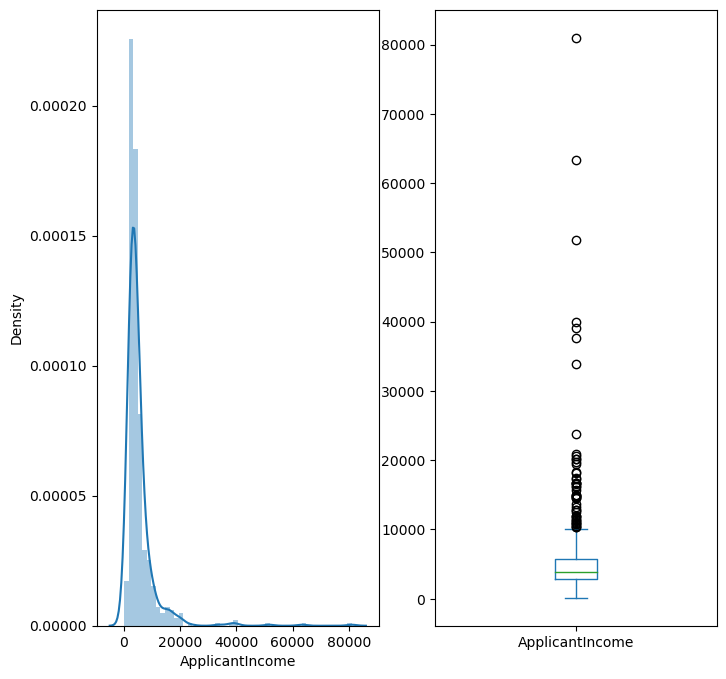

In [17]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
sns.distplot(train["ApplicantIncome"])

plt.subplot(1, 2, 2)
train["ApplicantIncome"].plot.box();

C:\Users\AlbertoJ\AppData\Local\Temp\ipykernel_14792\1094404631.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["LoanAmount"])


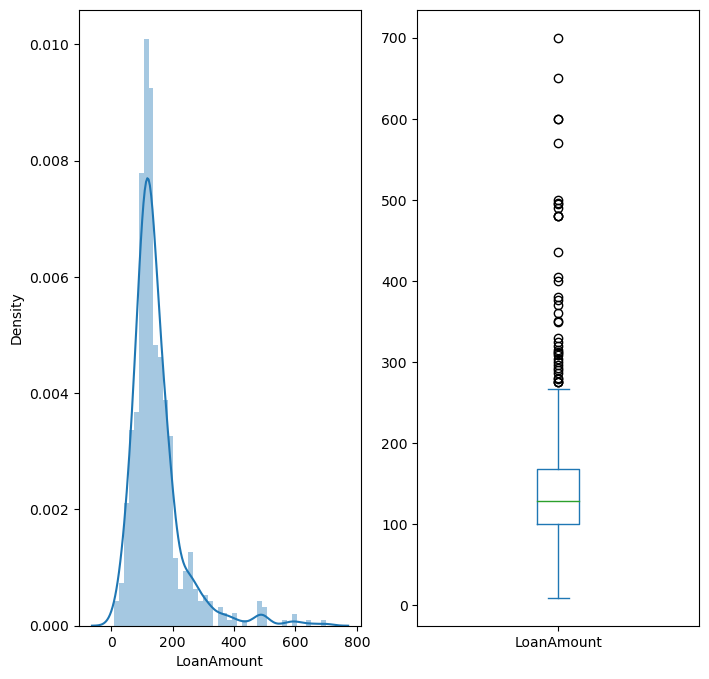

In [18]:
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
sns.distplot(train["LoanAmount"])

plt.subplot(1, 2, 2)
train["LoanAmount"].plot.box();